In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
df = pd.read_csv("us events ad_revenue filtered 03.02-07.02.csv")
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   profile_id               860065 non-null  object
 1   os_version               860079 non-null  object
 2   device_manufacturer      860079 non-null  object
 3   device_model             860079 non-null  object
 4   device_type              860079 non-null  object
 5   device_locale            860079 non-null  object
 6   event_name               860079 non-null  object
 7   event_json               860079 non-null  object
 8   event_datetime           860079 non-null  object
 9   event_timestamp          860079 non-null  int64 
 10  event_receive_datetime   860079 non-null  object
 11  event_receive_timestamp  860079 non-null  int64 
 12  connection_type          860079 non-null  object
 13  operator_name            841200 non-null  object
 14  country_iso_code    

Развернем данные json

In [4]:
df['jd'] = [json.loads(item) for item in df.event_json]
df = pd.concat([df, pd.json_normalize(df.jd)], axis=1)
df = df.drop(['event_json', 'jd'], axis=1)
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_timestamp,event_receive_datetime,...,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,...,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,...,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,...,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,...,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,...,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


Отделим данные используемые для решения поставленных задач

In [52]:
new_df = df.loc[:,['profile_id','city','os_version']]
new_df['eCMP'] = df['revenue'] * 1000
new_df['datetime_event_datetime'] = pd.to_datetime(df['event_datetime'])
new_df['hours_event_datetime'] = pd.to_datetime(new_df['datetime_event_datetime'], format='%H:%M').dt.hour
new_df = new_df.fillna('Nan_cities')
new_df

,profile_id,city,os_version,eCMP,datetime_event_datetime,hours_event_datetime
0,JLjpGzDHBQm,Norwalk,11,0.510313,2022-02-04 20:02:28,20
1,JLjpGzDHBQm,Norwalk,11,0.510313,2022-02-04 20:02:45,20
2,JLkVacrzHY6,Charlotte,11,2.386163,2022-02-05 17:53:05,17
3,JMC6wG3cX0f,Cocoa,10,13.893784,2022-02-06 17:09:01,17
4,JLzWWTJfi1b,Nan_cities,10,6.827570,2022-02-06 17:15:38,17
...,...,...,...,...,...,...
860074,JLSQY2nx1NQ,Elmira,12,0.019972,2022-02-03 08:29:27,8
860075,JLKWwju79CA,Cherry Hill,12,6.740355,2022-02-03 02:12:51,2
860076,JLKWwju79CA,Cherry Hill,12,2.780058,2022-02-03 02:13:06,2
860077,JLKWwju79CA,Cherry Hill,12,2.780058,2022-02-03 02:13:17,2


1a. Построить распределение средних eCPM-ов юзеров

In [12]:
profile_id = new_df.groupby('profile_id').agg('mean').sort_values('eCMP', ascending=True).reset_index()
profile_id

,profile_id,eCMP,hours_event_datetime
0,JLMPHS0N9pN,0.036730,9.000000
1,JMDtgimxrhR,0.051466,14.666667
2,JLyiKRAd5r3,0.055322,4.000000
3,JMGgSSx40E1,0.080685,11.000000
4,JLJxaq7EzmW,0.086811,13.000000
...,...,...,...
4222,JLkobxbBG62,219.315372,4.500000
4223,JMEP199wJ0S,239.000977,0.000000
4224,JLqk4x6H6L6,280.095306,23.000000
4225,JLkr58WqV4F,297.600000,7.500000


Т.к. число уникальных пользователей больше четырех тысяч, попробуем сгруппировать количесвта пользователей с шагом revenue равной 40 и построим горизонтальную гистограмму

In [13]:
group = 40
i = 0
group_by_profile_id = pd.DataFrame()
group_by_profile_id['eCMP'] = profile_id['eCMP'][::]
group_by_profile_id['group'] = [0]*len(profile_id['eCMP'])
group_by_profile_id['eCMP_between'] = [0]*len(profile_id['eCMP'])
while i != len(profile_id['eCMP']):
    if profile_id['eCMP'][i] < group:
        group_by_profile_id['group'][i] = group
        i += 1
    else:
        group += 40

profile_id_graph = group_by_profile_id.groupby('group').agg({'eCMP':'count'}).reset_index().sort_values('group')
profile_id_graph

C:\Users\HP\AppData\Local\Temp/ipykernel_7424/1027030007.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_by_profile_id['group'][i] = group


,group,eCMP
0,40,3817
1,80,234
2,120,45
3,160,52
4,200,60
5,240,16
6,320,2
7,400,1


Для удобства представления данных добивим столбец, где указывается диапазон между которыми лежат средний eCMP пользователя

In [17]:
profile_id_graph['for_graph'] = [0] * len(profile_id_graph['group'])
for i in range(len(profile_id_graph['group'])):
    profile_id_graph['for_graph'][i] = str(profile_id_graph['group'][i] - 40) + ' < mean eCMP < ' + str(profile_id_graph['group'][i])
profile_id_graph = profile_id_graph.sort_values('group', ascending=False)
profile_id_graph

,group,eCMP,for_graph
7,400,1,360 < mean eCMP < 400
6,320,2,280 < mean eCMP < 320
5,240,16,200 < mean eCMP < 240
4,200,60,160 < mean eCMP < 200
3,160,52,120 < mean eCMP < 160
2,120,45,80 < mean eCMP < 120
1,80,234,40 < mean eCMP < 80
0,40,3817,0 < mean eCMP < 40


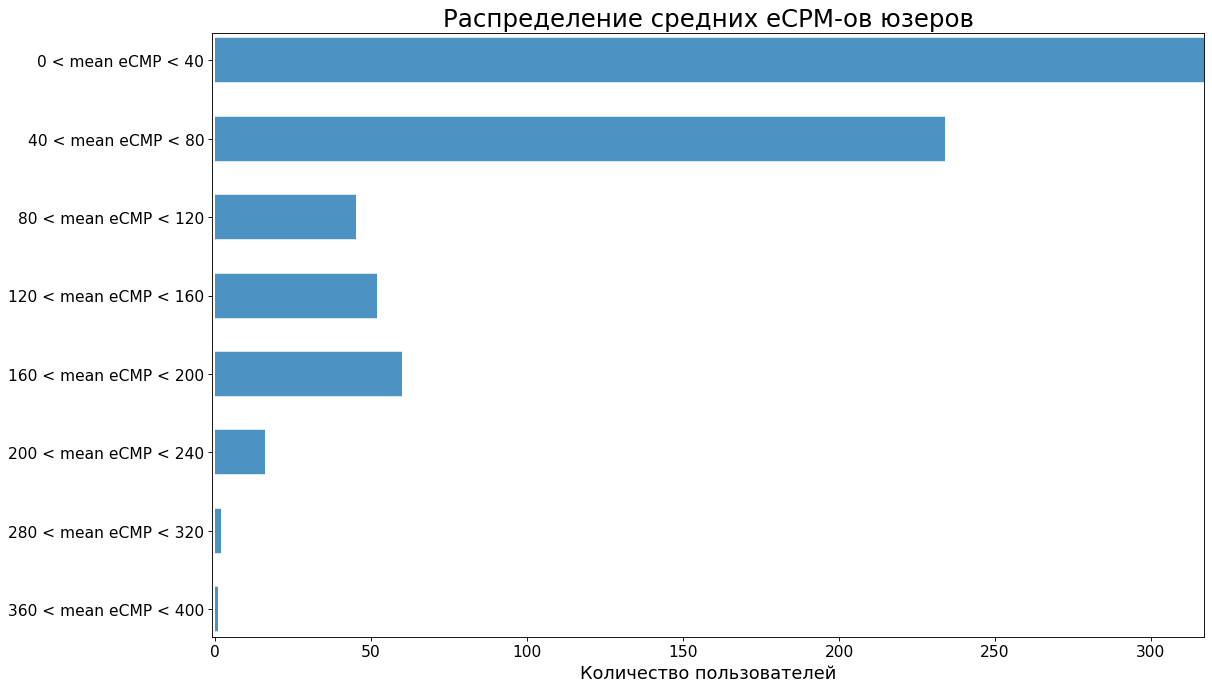

In [50]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
plt.hlines(y=profile_id_graph['for_graph'], xmin=0, xmax=profile_id_graph['eCMP'], alpha=0.8, linewidth=40)
plt.xlim(profile_id_graph.eCMP.min() - 2, profile_id_graph.eCMP.max() - 3500);
ax.set_title('Распределение средних eCPM-ов юзеров', fontdict={'size':22})
plt.xlabel('Количество пользователей', fontsize=16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

Т.к. большинство пользователей (а именно 3817 пользователей) относятся к первой группе с eCMP, то было принято решение урезать до х = 300 пользователей, чтобы показать распределение пользователей по другим группам.


1b. отобразить средние eCPM-ы по городам, версиям ОС

In [36]:
mean_eCPM_city = new_df.groupby('city').agg('mean').sort_values('eCMP', ascending=True).reset_index()
mean_eCPM_os_version = new_df.groupby('os_version').agg('mean').sort_values('eCMP', ascending=False).reset_index()
mean_eCPM_city = mean_eCPM_city.drop(['hours_event_datetime'], axis=1)
mean_eCPM_os_version = mean_eCPM_os_version.drop(['hours_event_datetime'], axis=1)

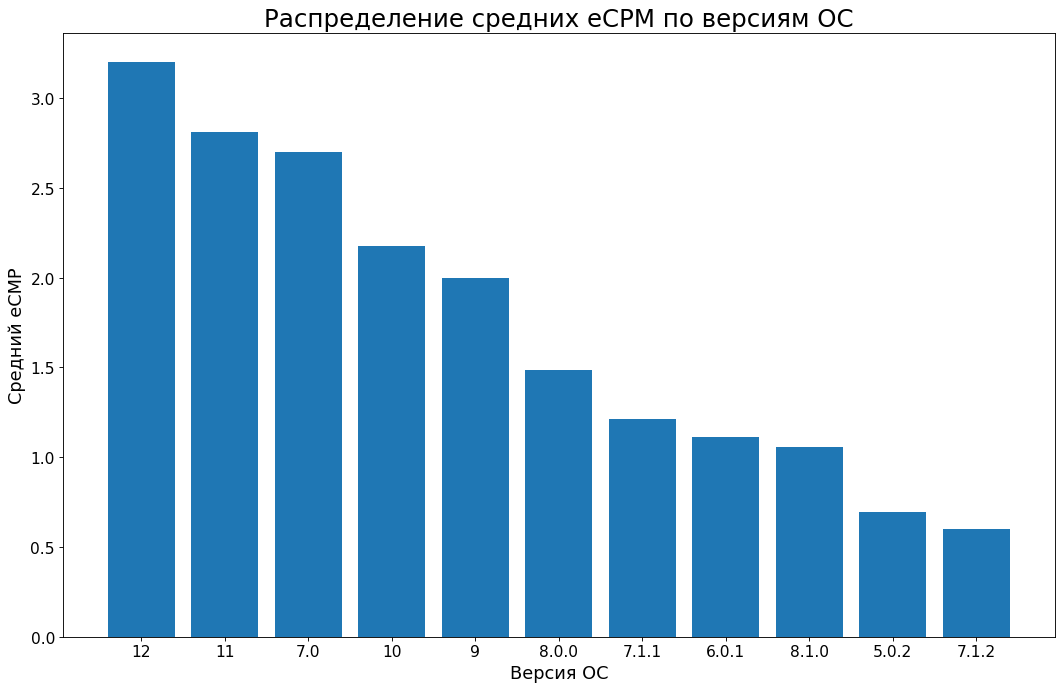

In [37]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.set_title('Распределение средних eCPM по версиям ОС', fontdict={'size':22})
plt.ylabel('Средний eCMP', fontsize=16)
plt.xlabel('Версия ОС', fontsize=16)
plt.bar(x = mean_eCPM_os_version.os_version, height = mean_eCPM_os_version.eCMP) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

In [41]:
mean_eCPM_city

,city,eCMP
0,Bell Gardens,0.040858
1,Waukesha,0.044964
2,Camden,0.069294
3,Kingston,0.087037
4,Beaumont,0.090090
...,...,...
916,Baton Rouge,198.166667
917,Owensboro,211.700000
918,Fredericksburg,214.480240
919,Lake Worth,219.315372


Т.к. городов 921 штук, то разделим на группы так же как и в задании 1а, с шагом eCMP=30

In [43]:
group = 30
i = 0
group_by_mean_eCPM_city = pd.DataFrame()
group_by_mean_eCPM_city['eCMP'] = mean_eCPM_city['eCMP'][::]
group_by_mean_eCPM_city['group'] = [0]*len(mean_eCPM_city['eCMP'])
group_by_mean_eCPM_city['eCMP_between'] = [0]*len(mean_eCPM_city['eCMP'])
while i != len(mean_eCPM_city['eCMP']):
    if mean_eCPM_city['eCMP'][i] < group:
        group_by_mean_eCPM_city['group'][i] = group
        i += 1
    else:
        group += 30

mean_eCPM_city_graph = group_by_mean_eCPM_city.groupby('group').agg({'eCMP':'count'}).reset_index().sort_values('group')
mean_eCPM_city_graph

C:\Users\HP\AppData\Local\Temp/ipykernel_7424/4059139193.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_by_mean_eCPM_city['group'][i] = group


,group,eCMP
0,30,863
1,60,18
2,90,21
3,120,2
4,150,7
5,180,1
6,210,5
7,240,3
8,300,1


Для удобства представления данных добивим столбец, где указывается диапазон между которыми лежат средний eCMP пользователя

In [45]:
mean_eCPM_city_graph['for_graph'] = [0] * len(mean_eCPM_city_graph['group'])
for i in range(len(mean_eCPM_city_graph['group'])):
    mean_eCPM_city_graph['for_graph'][i] = str(mean_eCPM_city_graph['group'][i] - 30) + ' < mean eCMP < ' + str(mean_eCPM_city_graph['group'][i])
mean_eCPM_city_graph = mean_eCPM_city_graph.sort_values('group', ascending=False)
mean_eCPM_city_graph

,group,eCMP,for_graph
8,300,1,270 < mean eCMP < 300
7,240,3,210 < mean eCMP < 240
6,210,5,180 < mean eCMP < 210
5,180,1,150 < mean eCMP < 180
4,150,7,120 < mean eCMP < 150
3,120,2,90 < mean eCMP < 120
2,90,21,60 < mean eCMP < 90
1,60,18,30 < mean eCMP < 60
0,30,863,0 < mean eCMP < 30


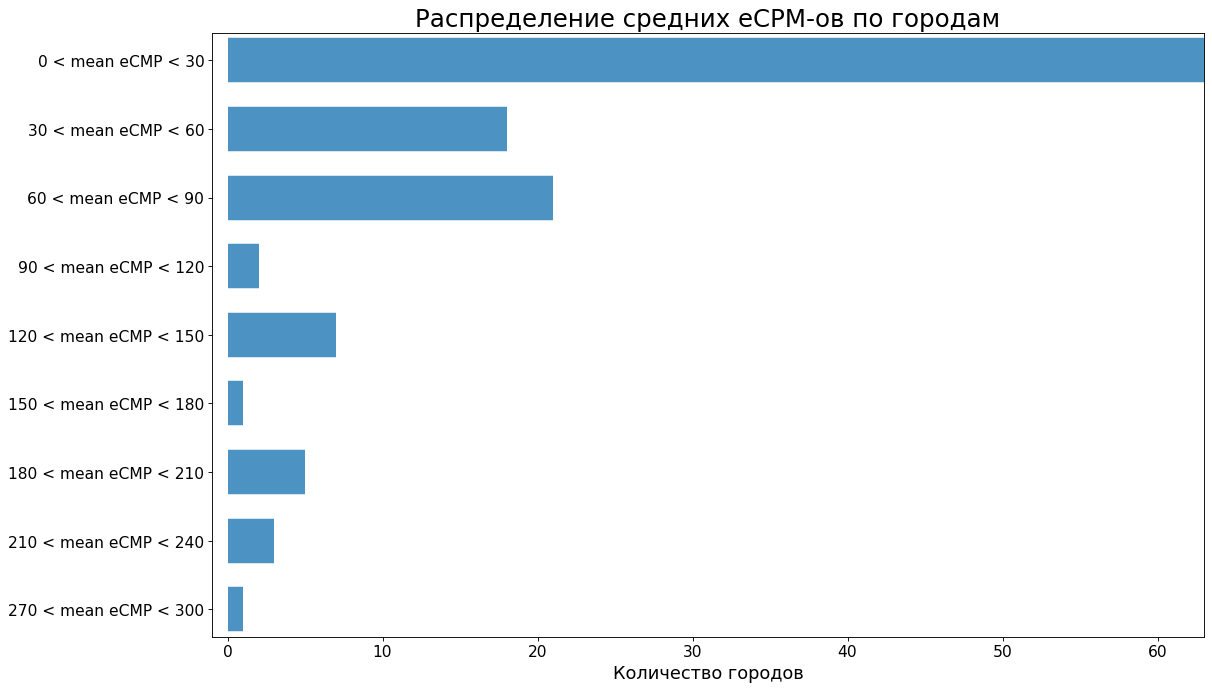

In [49]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
plt.hlines(y=mean_eCPM_city_graph['for_graph'], xmin=0, xmax=mean_eCPM_city_graph['eCMP'], alpha=0.8, linewidth=40)
plt.xlim(mean_eCPM_city_graph.eCMP.min() - 2, mean_eCPM_city_graph.eCMP.max() - 800);
ax.set_title('Распределение средних eCPM-ов по городам', fontdict={'size':22})
plt.xlabel('Количество городов', fontsize=16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

1c. отобразить суммарные доходы по городам, версиям ОС

In [56]:
sum_eCPM_city = new_df.groupby('city').agg('sum').sort_values('eCMP', ascending=True).reset_index()
sum_eCPM_os_version = new_df.groupby('os_version').agg('sum').sort_values('eCMP', ascending=False).reset_index()
sum_eCPM_city = sum_eCPM_city.drop(['hours_event_datetime'], axis=1)
sum_eCPM_os_version = sum_eCPM_os_version.drop(['hours_event_datetime'], axis=1)

In [58]:
sum_eCPM_os_version

,os_version,eCMP
0,12,1.305579e+06
1,11,5.872248e+05
2,10,3.282679e+05
3,9,1.331059e+05
4,8.0.0,1.189202e+04
5,7.0,1.095099e+04
6,8.1.0,9.787017e+03
7,7.1.1,1.624575e+03
8,7.1.2,1.089698e+03
9,6.0.1,7.832718e+02


Видно, что ОС с версиями меньше, чем девятый значительно малы по сравнению с новыми версиями, поэтому отнесем их в "other"

In [61]:
os_sum_eCPM = sum_eCPM_os_version[:4]
os_sum_eCPM = os.append({'os_version': 'other', 'eCMP': sum(sum_eCPM_os_version.eCMP[4:])}, ignore_index=True)

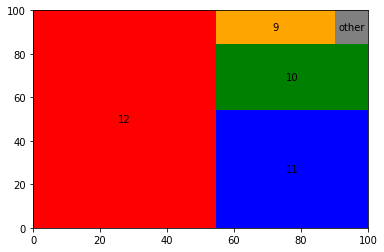

In [62]:
import squarify
squarify.plot(os.eCMP, label = os_sum_eCPM.os_version, color=['r', 'b', 'g', 'orange', 'grey'])
plt.show()

Ну или привычный уже

<BarContainer object of 6 artists>

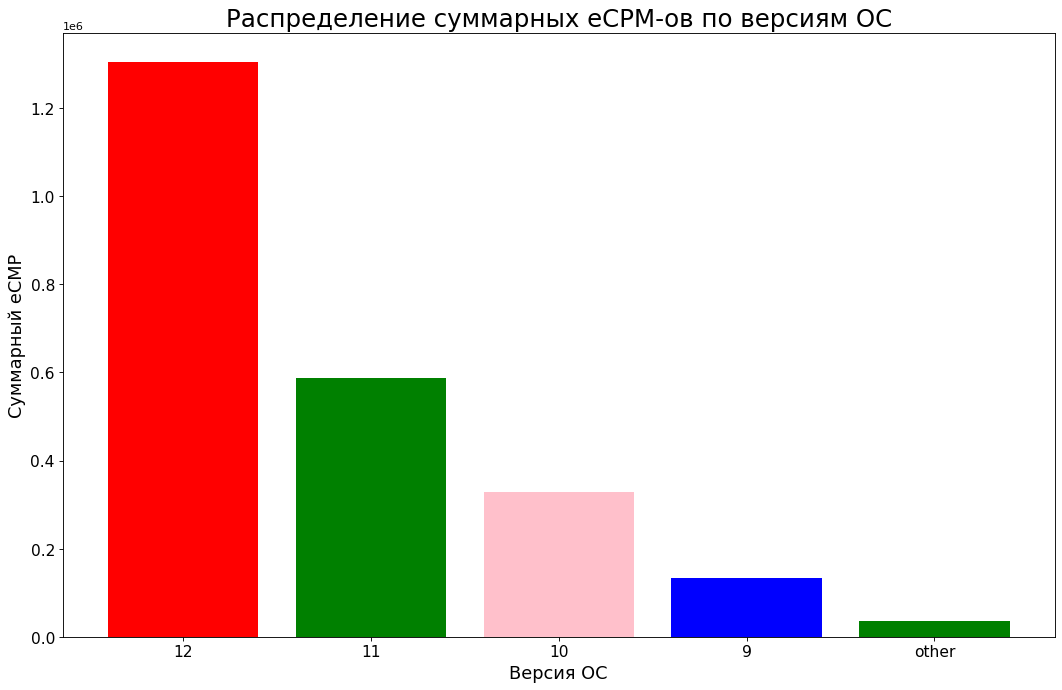

In [75]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.set_title('Распределение суммарных eCPM-ов по версиям ОС', fontdict={'size':22})
plt.ylabel('Суммарный eCMP', fontsize=16)
plt.xlabel('Версия ОС', fontsize=16)
plt.bar(x = os_sum_eCPM.os_version, height = os_sum_eCPM.eCMP) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.bar(x = os_sum_eCPM.os_version, height = os_sum_eCPM.eCMP, color=['red', 'green','pink','blue']) 

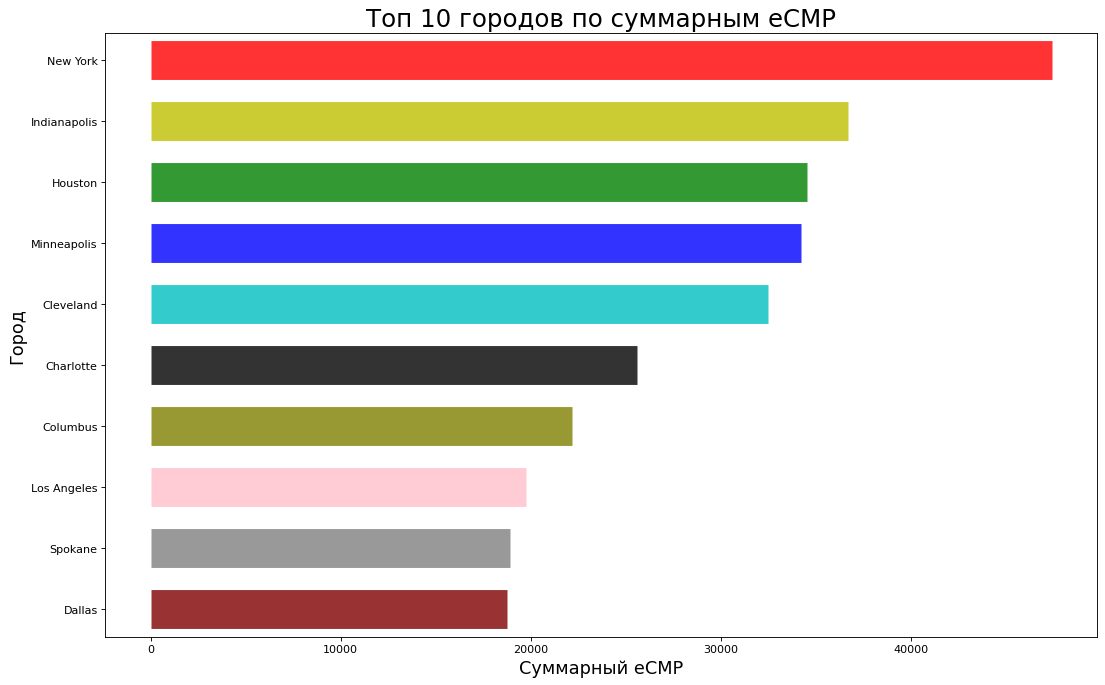

In [68]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.set_title('Топ 10 городов по суммарным eCMP', fontdict={'size':22})
plt.ylabel('Город', fontsize=16)
plt.xlabel('Суммарный eCMP', fontsize=16)
plt.hlines(y=sum_eCPM_city.city[-11:-1], xmin=0, xmax=sum_eCPM_city.eCMP[-11:-1], color=['maroon', 'gray','pink','olive','k','c','b','g','y','r'], alpha=0.8, linewidth=35)

Ну и разделим на группы

In [84]:
group = 5000
i = 0
group_by_sum_eCPM_city = pd.DataFrame()
group_by_sum_eCPM_city['eCMP'] = sum_eCPM_city['eCMP'][:-1]
group_by_sum_eCPM_city['group'] = [0]*(len(sum_eCPM_city['eCMP'])-1)
while i != len(sum_eCPM_city['eCMP'])-1:
    if sum_eCPM_city['eCMP'][i] < group:
        group_by_sum_eCPM_city['group'][i] = group
        i += 1
    else:
        group += 5000
        
group_by_sum_eCPM_city = group_by_sum_eCPM_city.groupby('group').agg({'eCMP':'count'}).reset_index().sort_values('group')
group_by_sum_eCPM_city

C:\Users\HP\AppData\Local\Temp/ipykernel_7424/3018207118.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_by_sum_eCPM_city['group'][i] = group


,group,eCMP
0,5000,849
1,10000,43
2,15000,13
3,20000,8
4,25000,1
5,30000,1
6,35000,3
7,40000,1
8,50000,1


In [85]:
group_by_sum_eCPM_city['for_graph'] = [0] * len(group_by_sum_eCPM_city['group'])
for i in range(len(group_by_sum_eCPM_city['group'])):
    group_by_sum_eCPM_city['for_graph'][i] = str(group_by_sum_eCPM_city['group'][i] - 5000) + ' < mean eCMP < ' + str(group_by_sum_eCPM_city['group'][i])
group_by_sum_eCPM_city = group_by_sum_eCPM_city.sort_values('group', ascending=False)
group_by_sum_eCPM_city.sort_values('group')

,group,eCMP,for_graph
0,5000,849,0 < mean eCMP < 5000
1,10000,43,5000 < mean eCMP < 10000
2,15000,13,10000 < mean eCMP < 15000
3,20000,8,15000 < mean eCMP < 20000
4,25000,1,20000 < mean eCMP < 25000
5,30000,1,25000 < mean eCMP < 30000
6,35000,3,30000 < mean eCMP < 35000
7,40000,1,35000 < mean eCMP < 40000
8,50000,1,45000 < mean eCMP < 50000


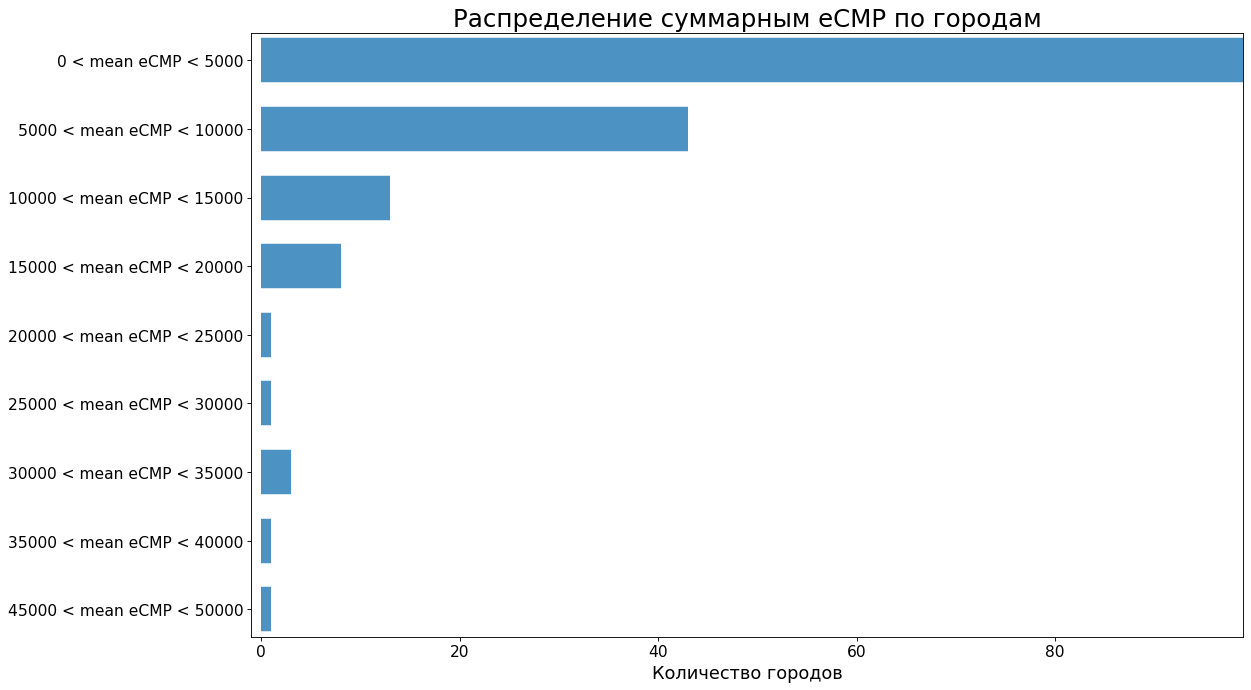

In [89]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
plt.hlines(y=group_by_sum_eCPM_city['for_graph'], xmin=0, xmax=group_by_sum_eCPM_city['eCMP'], alpha=0.8, linewidth=40)
plt.xlim(group_by_sum_eCPM_city.eCMP.min() - 2, group_by_sum_eCPM_city.eCMP.max() - 750);
ax.set_title('Распределение суммарным eCMP по городам', fontdict={'size':22})
plt.xlabel('Количество городов', fontsize=16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

2. Учесть статистическую значимость для п.1b (отобразить, отфильтровать
незначимое или хотя бы прокомментировать). Объяснить решение.

Среднее значение не всегда показывает, то что мы хотим, и в примере распределение средних eCMP по версиям ОС это прекрасно видно. График средних eCMP по версиям ОС говорит, что версия ОС 7.0 занимает 3 место по доходности, а это не так, т.к. суммарный eCMP этой версии ОС очень низкий. 

С городоми примерно также, но есть еще существенный изъян - нет данных по городам пользователей у трети пользователей (323 708 пользователей, если быть точным), что не дает однозначно говорить о средних и суммарных eCMP.

3. Описать наблюдения и вывод по исследованию.

В результате исследования можно сделать вывод о том, что пора задуматься о прекращении поддержки ОС 5 и 6 версий, т.к. их доходность на порядки ниже чем версии 9-12 ОС, версии 7-8 еще приносят какие-то доходы, но в ближащее время стоит также прератить их поддержку и сконцентрироваться на новых версиях ОС.

Из 921 городов 71 из них имеют доходность свыше 5000, а больше 20000 долларов только 7 городов. Можно сфокусироваться на остьных 64 городов и добиться доходности до 20000, не забывая при этом про топ города. Эти выводы могут существенно отличаться от фактических, т.к. доход из городов Nan составляет 870846.06 долларов и мб так, что топ 10 будут другими городами, а мы сконцентрировали внимание на наших топ городах.

In [90]:
sum_eCPM_city.eCMP[-1:]

920    870846.063383
Name: eCMP, dtype: float64

Доп задание: Зависит ли eCPM от времени дня

<BarContainer object of 24 artists>

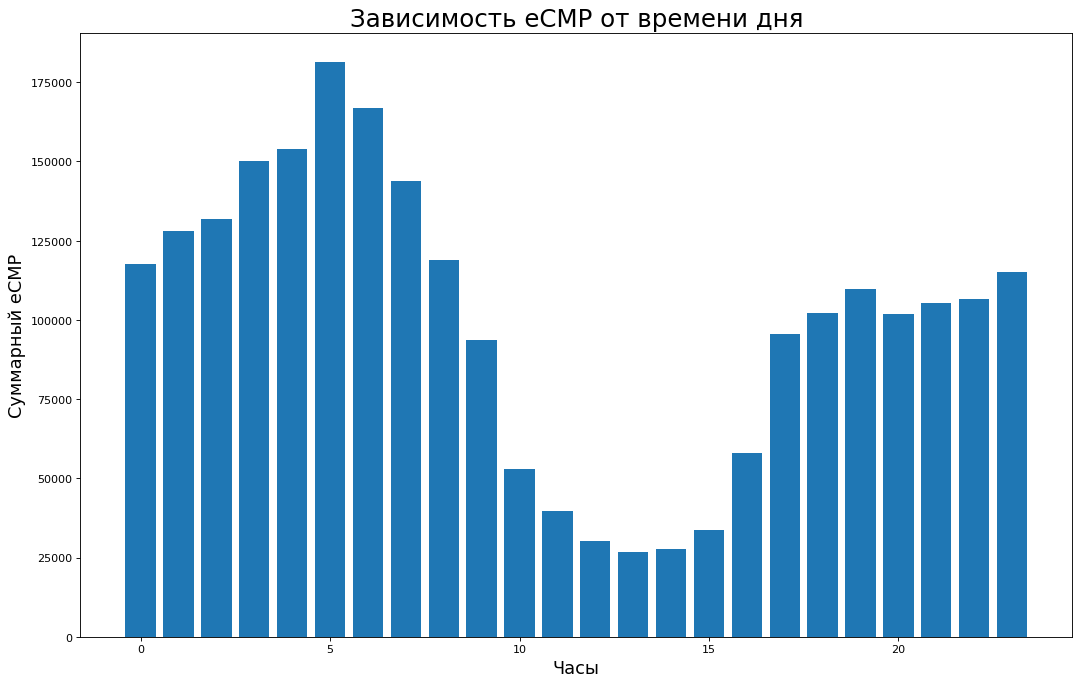

In [93]:
groupbe_hours = new_df.groupby('hours_event_datetime').sum().round(2)
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.set_title('Зависимость eCMP от времени дня', fontdict={'size':22})
plt.ylabel('Суммарный eCMP', fontsize=16)
plt.xlabel('Часы', fontsize=16)
plt.bar(x = groupbe_hours.index, height = groupbe_hours.eCMP)

В ночное время наблюдается наибольший Суммарный eCMP, стоит сконцентрировать внимание на ночное время актвации пользователей